In [1]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

The following code aims to demonstrate the use of Gradient Boosting on the original features in the provided dataset and on a hybrid dataset that was found using the PCA features. The two csv files named 'df-filteredfinalN.csv' and 'PCAFeatures.csv' are used for loading the original dataset and the hybrid dataset respectively.

# 1. Original Dataset Features:

In [2]:
df= pd.read_csv('df-filteredfinalN.csv')
                
x=df[['Day','State ID','Lat','Long_','Incident_Rate','Active','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']].values

y=df['Confirmed'].values

y1= df['Deaths'].values

y2= df['Recovered'].values


# Hyper-Parameter Tuning- Label 1('Confirmed'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


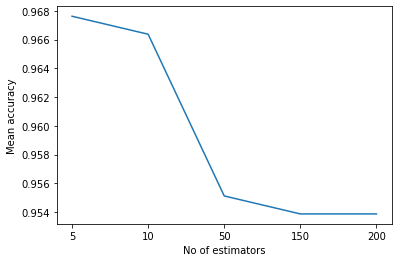

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 1 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 1 in original dataset 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation: 

In [4]:
grid.best_params_

{'n_estimators': 5, 'random_state': 0}

In [5]:
grid.best_score_

0.9676234567901234

In [6]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=5, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 5.

# Parameter Testing:

In [7]:
gbo= GradientBoostingClassifier(n_estimators=5, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.945273631840796


The accuracy of the test set for the trained classifier is approximately 94.53 percent and this shows that the classifier is great at predicting the output for the label with less than 6 percent of error.

# Hyper-Parameter Tuning- Label 2('Deaths'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


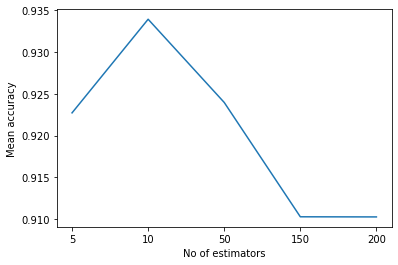

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 2 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 2 in original dataset 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation:

In [9]:
grid.best_params_

{'n_estimators': 10, 'random_state': 0}

In [10]:
grid.best_score_

0.9339506172839507

In [11]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=10, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 10.

# Parameter Testing:

In [12]:
gbo= GradientBoostingClassifier(n_estimators=10, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9303482587064676


The accuracy of the test set for the trained classifier is approximately 93.03 percent and this shows that the classifier is great at predicting the output for the label with less than 7 percent of error.

# Hyper-Parameter Tuning- Label 3('Recovered'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


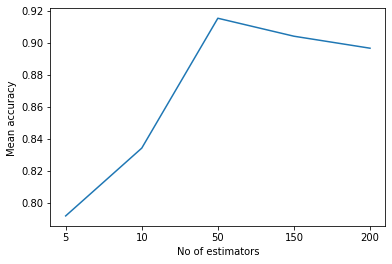

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 3 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 3 in original dataset 

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation:

In [14]:
grid.best_params_

{'n_estimators': 50, 'random_state': 0}

In [15]:
grid.best_score_

0.9151697530864198

In [16]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 50.

# Parameter Testing:

In [17]:
gbo= GradientBoostingClassifier(n_estimators=50, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9552238805970149


The accuracy of the test set for the trained classifier is approximately 95.52 percent and this shows that the classifier is great at predicting the output for the label with less than 5 percent of error.

# 2. PCA Features:

In [18]:
pcaf=pd.read_csv('PCAFeatures.csv')
x=pcaf[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']].values
y=pcaf['Confirmed'].values
y1=pcaf['Deaths'].values
y2=pcaf['Recovered'].values


# Hyper-Parameter Tuning- Label 1('Confirmed'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


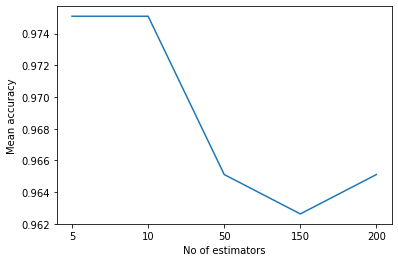

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 4 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 1 in extracted features by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation:

In [20]:
grid.best_params_

{'n_estimators': 5, 'random_state': 0}

In [21]:
grid.best_score_

0.9750925925925926

In [22]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=5, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 5.

# Parameter Testing:

In [23]:
gbo= GradientBoostingClassifier(n_estimators=5, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9502487562189055


The accuracy of the test set for the trained classifier is approximately 95.02 percent and this shows that the classifier is great at predicting the output for the label with less than 5 percent of error.

# Hyper-Parameter Tuning- Label 2('Deaths'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


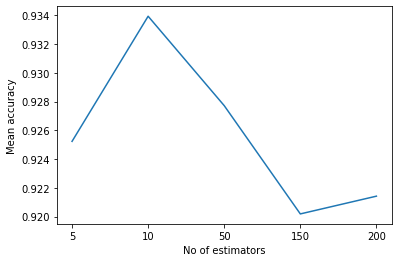

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 5 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 2 in extracted features by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation:

In [25]:
grid.best_params_

{'n_estimators': 10, 'random_state': 0}

In [26]:
grid.best_score_

0.9339351851851851

In [27]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=10, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 10.

# Parameter Testing:

In [28]:
gbo= GradientBoostingClassifier(n_estimators=10, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.9303482587064676


The accuracy of the test set for the trained classifier is approximately 93.03 percent and this shows that the classifier is great at predicting the output for the label with less than 3 percent of error.

# Hyper-Parameter Tuning- Label 3('Recovered'):

Fitting 10 folds for each of 5 candidates, totalling 50 fits


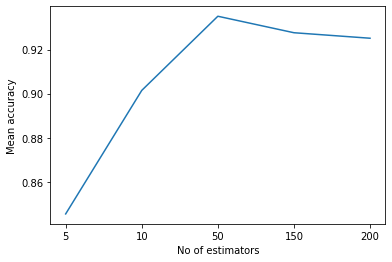

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2, random_state = 0)

grid_param= {'n_estimators':[5,10,50,150,200], 'random_state':[0]}
gb= GradientBoostingClassifier()
grid= GridSearchCV(gb,grid_param, cv=10, verbose=1, n_jobs= -1)
grid.fit(x_train, y_train)
estimators=['5','10','50','150','200']
plt.xlabel('No of estimators')
plt.ylabel('Mean accuracy')
plt.plot(estimators,grid.cv_results_['mean_test_score'])

Figure 6 Mean accuracy based on number of estimators for Hyper-Parameter Tuning- Label 3 in extracted features by PCA

Initially, the data is split with 80% of the data used for training and 20% percent of the data left for testing. The data is classified using Decision trees with the number of trees being: {5,10,50,150,200}. The Gradient Boosting classifier is intialized as 'gb'(1)and the K-fold cross validation is used with k being 10 for the trees. 'GridSearchCV' is used to find the best values for the classifier(2). The Mean accuracy of the trained estimators is reported on a plot using the plot command from the Matplot library(3).

# Best Parameter Evaluation:

In [30]:
grid.best_params_

{'n_estimators': 50, 'random_state': 0}

In [31]:
grid.best_score_

0.9351388888888887

In [32]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=0)

The best parameter for the Gradient Boosting Classifier is when the number of estimators is 50.

# Parameter Testing:

In [33]:
gbo= GradientBoostingClassifier(n_estimators=50, random_state=0)
gbo.fit(x_train,y_train)
y_pred= gbo.predict(x_test)
print("Accuracy on test set: " ,accuracy_score(y_test,y_pred))

Accuracy on test set:  0.945273631840796


The accuracy of the test set for the trained classifier is approximately 94.53 percent and this shows that the classifier is great at predicting the output for the label with less than 6 percent of error.

# References:

(1)https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

(2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

(3)https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html